In [1]:
!pip install xarray matplotlib numpy

# UK

## Mean Temperature

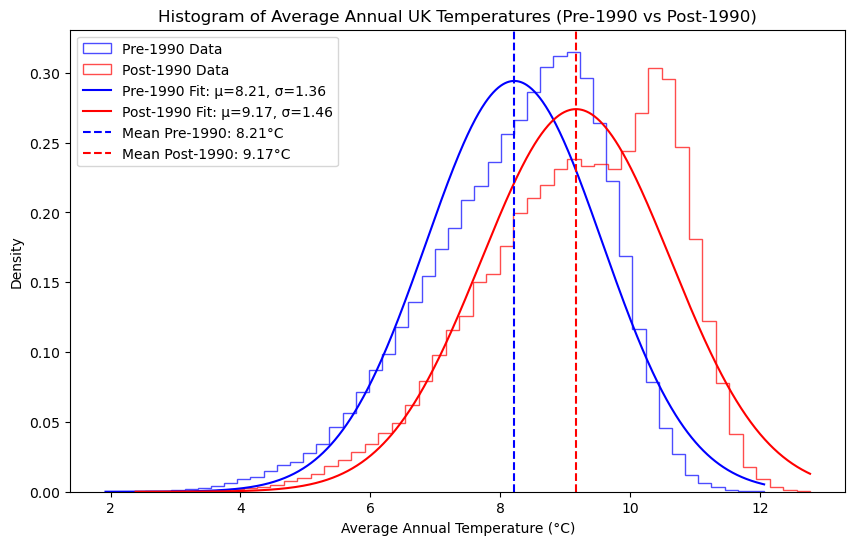

In [47]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/*.nc", parallel=False)
time_index = pd.to_datetime(data_temp.time.values)
data_all_months = data_temp.tas.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)
time_years = np.arange(1884, 2024)

pre_1990_mask = time_years < 1990#separate pre and post 1990
post_1990_mask = time_years >= 1990
pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]#remove nans
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)#fit gaussian
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)#generate data for gaussian
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)
x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

#plotting histogram and curves
plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Annual Temperature (°C)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Temperatures (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Rainfall

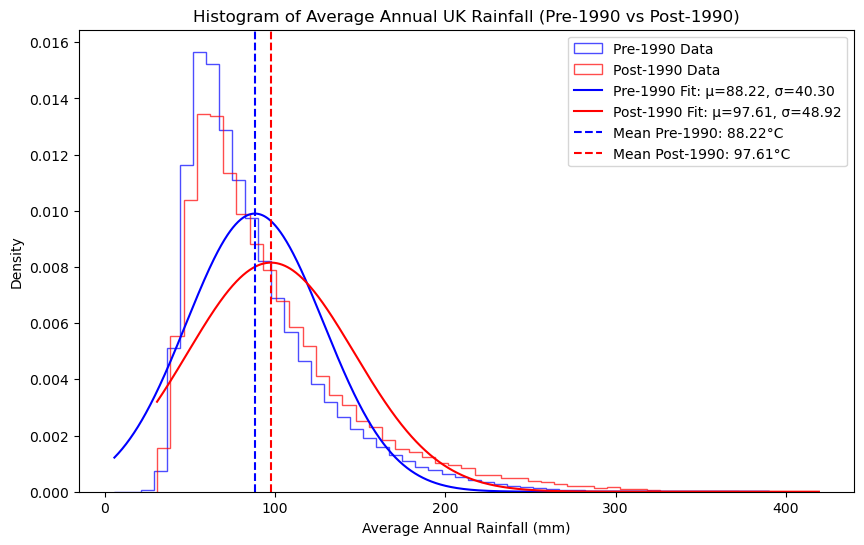

In [35]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm
data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/rainfall/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.rainfall.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1836, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Annual Rainfall (mm)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Rainfall (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Sea Level Pressure

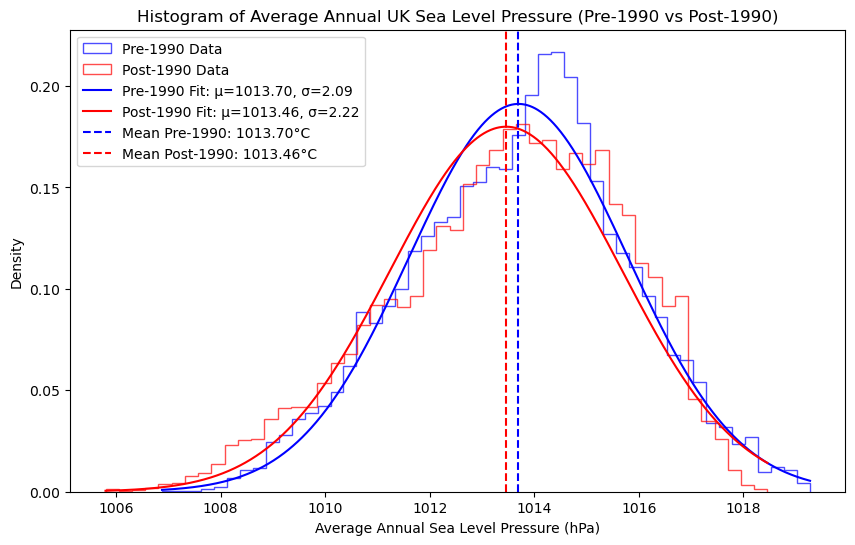

In [5]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/psl/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.psl.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1961, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Annual Sea Level Pressure (hPa)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Sea Level Pressure (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Max. Temperature

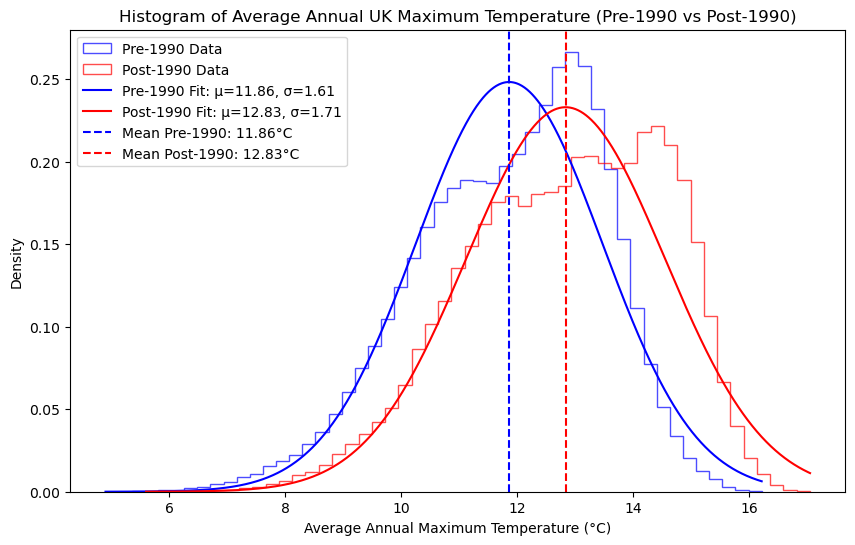

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tasmax/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.tasmax.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1884, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990
pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Annual Maximum Temperature (°C)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Maximum Temperature (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Min. Temperature

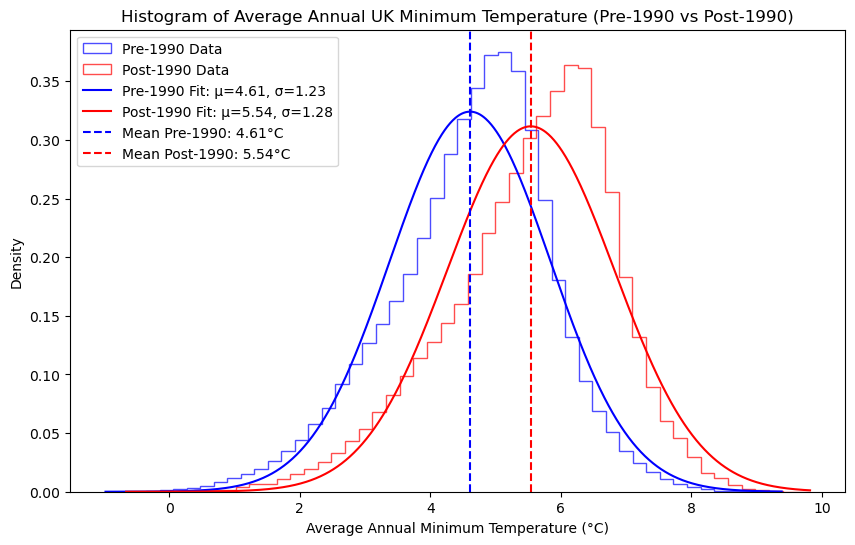

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tasmin/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.tasmin.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1884, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Annual Minimum Temperature (°C)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Minimum Temperature (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Sunshine

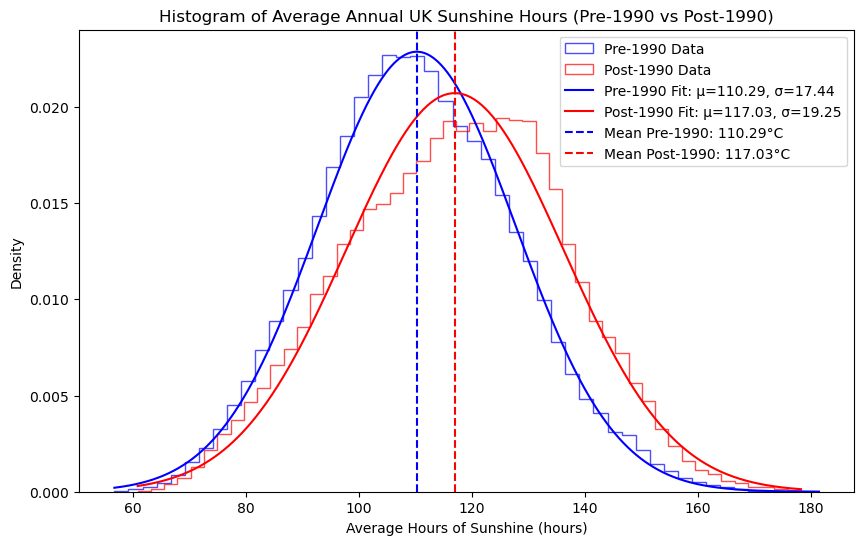

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/sun/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.sun.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1910, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Hours of Sunshine (hours)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Sunshine Hours (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Wind Speed

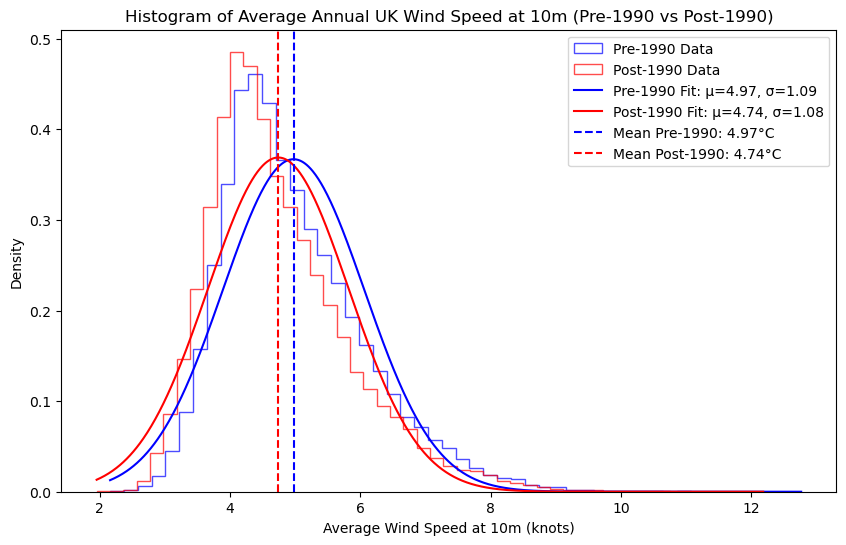

In [6]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/sfcWind/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.sfcWind.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1969, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Wind Speed at 10m (knots)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Wind Speed at 10m (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Relative Humidity

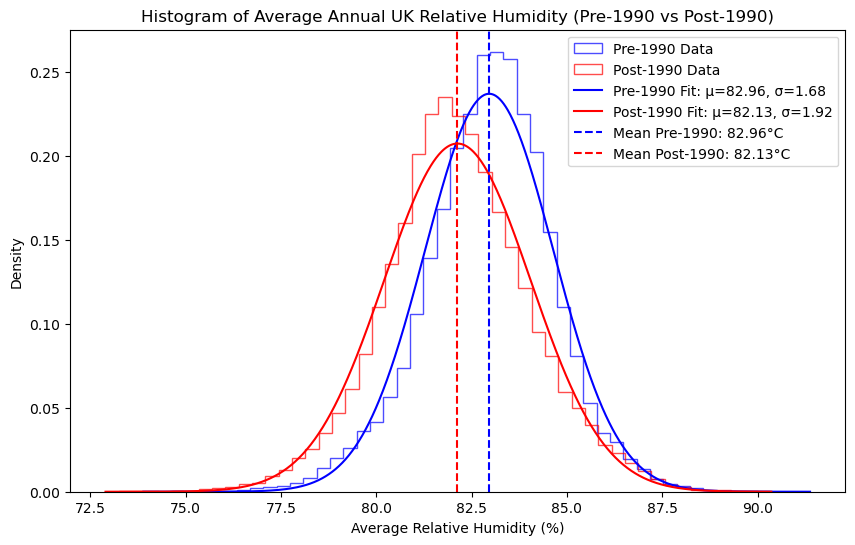

In [7]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/hurs/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.hurs.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1961, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Relative Humidity (%)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Relative Humidity (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Vapour Pressure

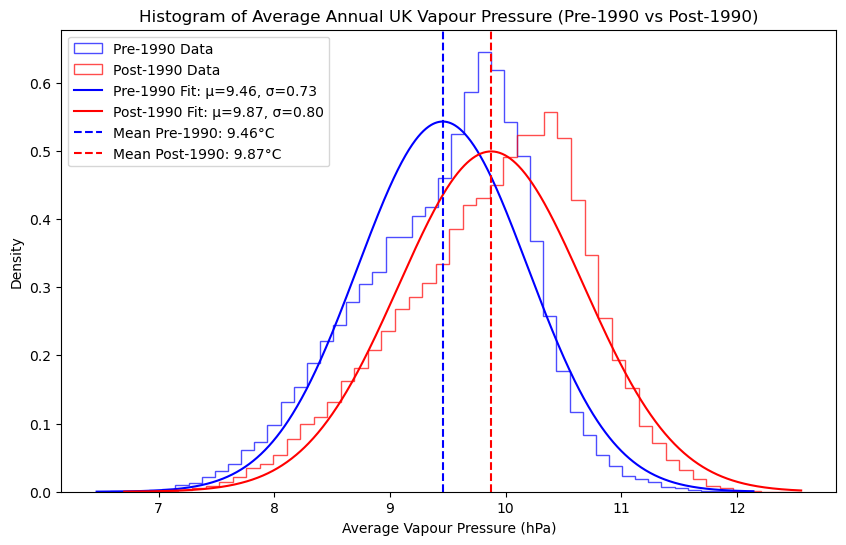

In [8]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/pv/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.pv.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1961, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Vapour Pressure (hPa)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Vapour Pressure (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Groundfrost

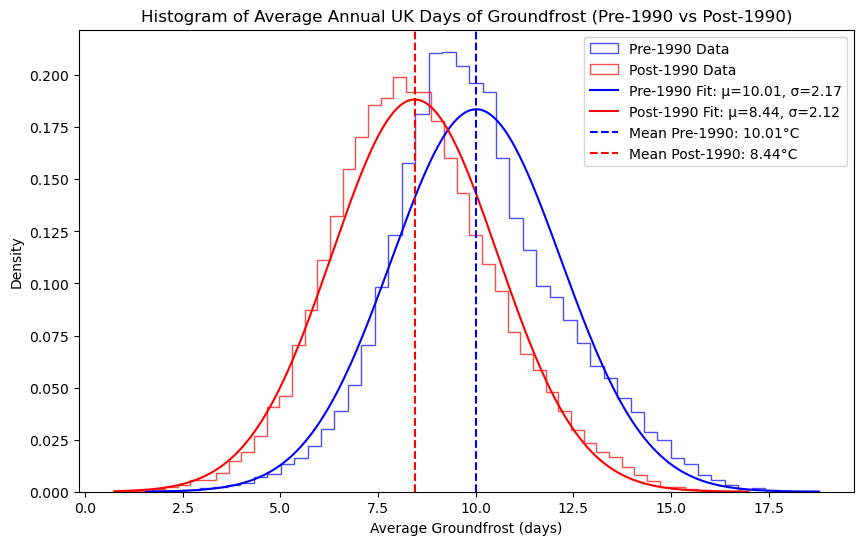

In [9]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/groundfrost/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)
data_all_months = data_temp.groundfrost.values 
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1961, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Groundfrost (days)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Days of Groundfrost (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


## Snow Lying

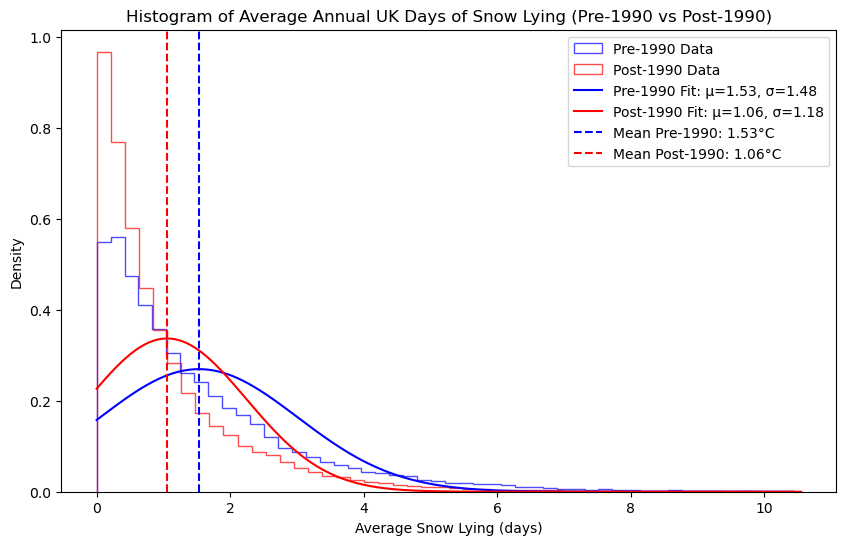

In [11]:
import numpy as np
import pandas as pd
import xarray as xr
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from scipy.stats import norm

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/snowLying/mon/v20240514/*.nc", parallel=False)

time_index = pd.to_datetime(data_temp.time.values)

data_all_months = data_temp.snowLying.values
annual_means = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)

time_years = np.arange(1971, 2024)

pre_1990_mask = time_years < 1990
post_1990_mask = time_years >= 1990

pre_1990_temps = annual_means[pre_1990_mask, :, :].flatten()
post_1990_temps = annual_means[post_1990_mask, :, :].flatten()

pre_1990_temps = pre_1990_temps[~np.isnan(pre_1990_temps)]
post_1990_temps = post_1990_temps[~np.isnan(post_1990_temps)]

mean_pre, std_pre = norm.fit(pre_1990_temps)
mean_post, std_post = norm.fit(post_1990_temps)

x_pre = np.linspace(min(pre_1990_temps), max(pre_1990_temps), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(min(post_1990_temps), max(post_1990_temps), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temps, bins=50, density=True, alpha=0.7, label="Pre-1990 Data", color="blue", histtype="step")
plt.hist(post_1990_temps, bins=50, density=True, alpha=0.7, label="Post-1990 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1990 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1990 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1990: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1990: {mean_post:.2f}°C")
plt.xlabel("Average Snow Lying (days)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual UK Days of Snow Lying (Pre-1990 vs Post-1990)")
plt.legend()
plt.show()


# Canadian Data (AHCCD)

## Rainfall

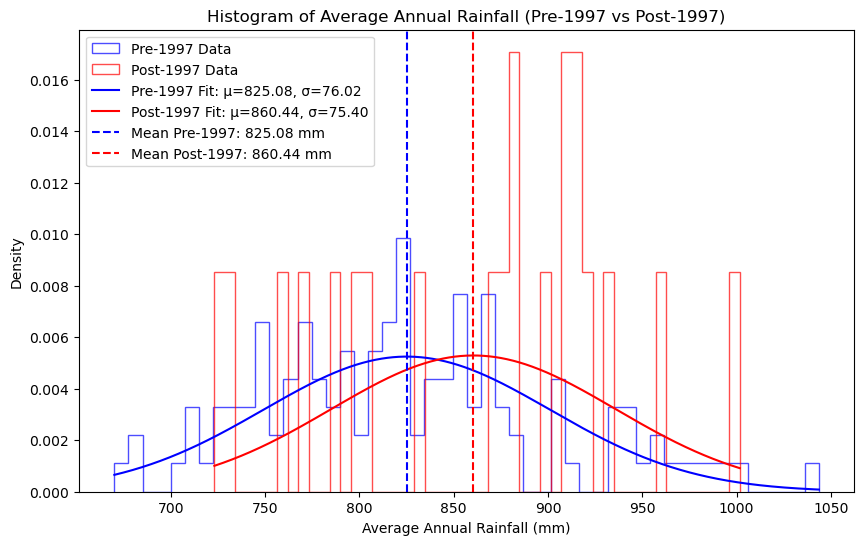

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)
start_year = 1875
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

rainfall_data = ahccd_data[ahccd_data['Value Type'] == 'Rain']
annual_rainfall = rainfall_data.groupby('Year')['Annual'].mean()

pre_1990_rainfall = annual_rainfall[annual_rainfall.index < split_year]
post_1990_rainfall = annual_rainfall[annual_rainfall.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_rainfall)
mean_post, std_post = norm.fit(post_1990_rainfall)

x_pre = np.linspace(pre_1990_rainfall.min(), pre_1990_rainfall.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_rainfall.min(), post_1990_rainfall.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_rainfall, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_rainfall, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f} mm")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f} mm")
plt.xlabel("Average Annual Rainfall (mm)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Rainfall (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Mean Temperature

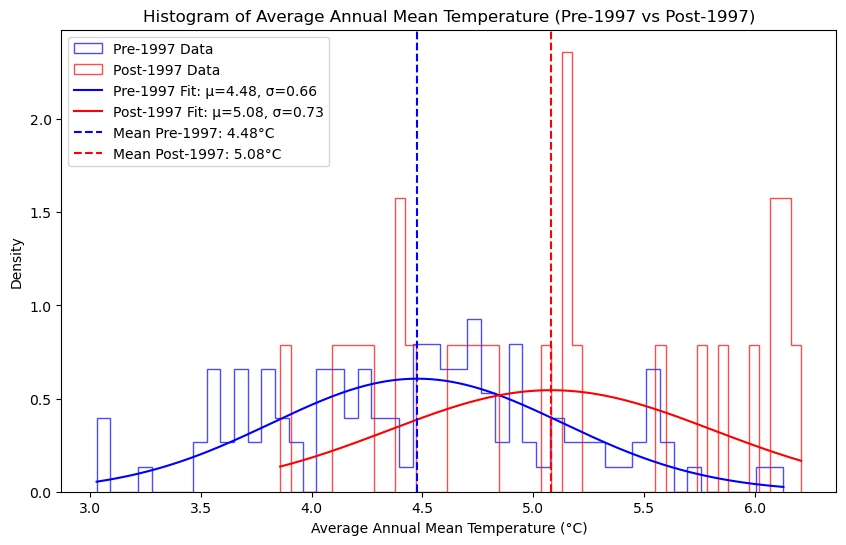

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)

start_year = 1875
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Mean Temperature']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Mean Temperature (°C)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Mean Temperature (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Sea Level Pressure

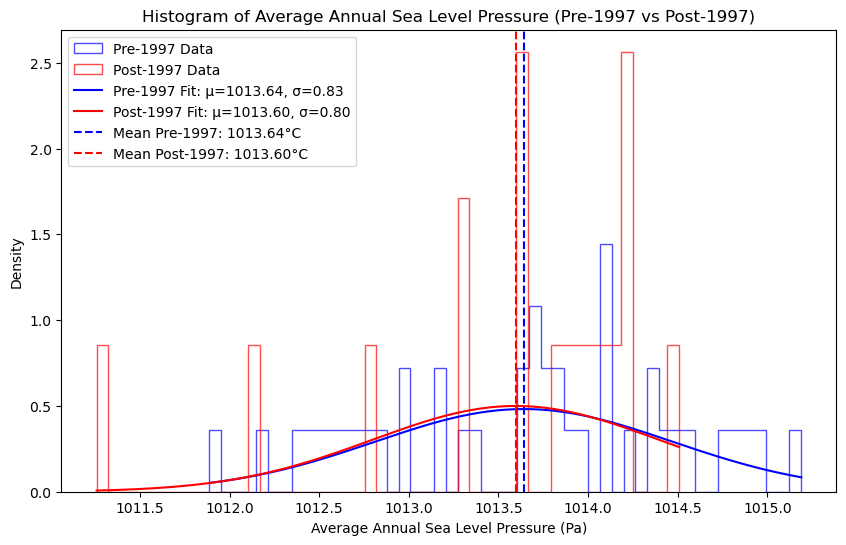

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)

start_year = 160
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Sea Level Pressure']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Sea Level Pressure (Pa)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Sea Level Pressure (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Min Temperature

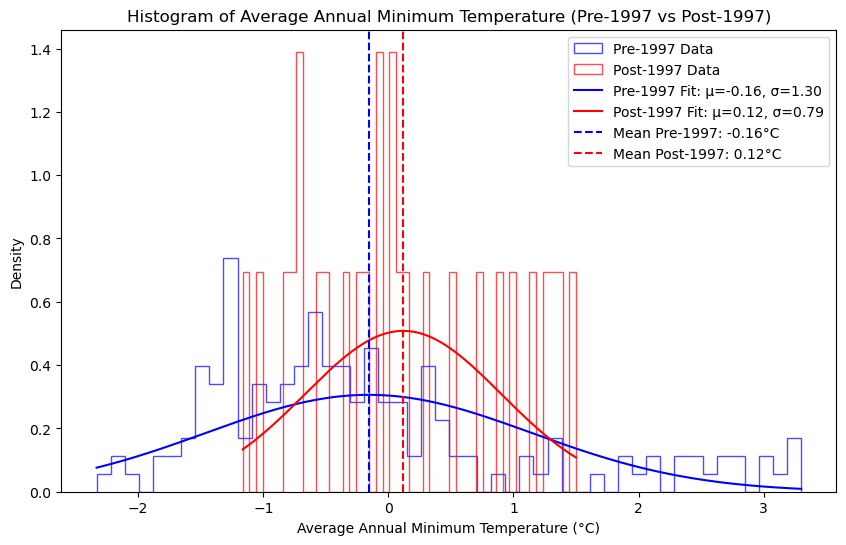

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)

start_year = 1841
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Min Temperature']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Minimum Temperature (°C)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Minimum Temperature (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Max Temperaature

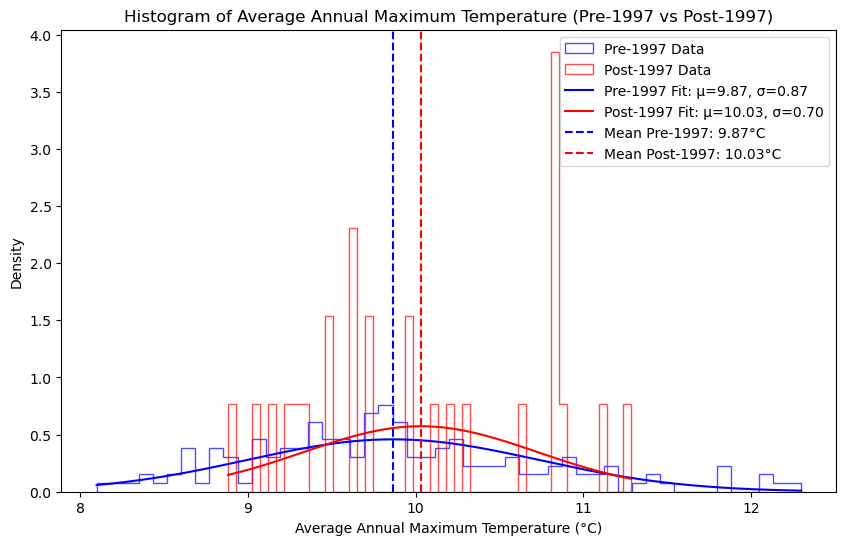

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)
start_year = 1841
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]
temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Max Temperature']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Maximum Temperature (°C)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Maximum Temperature (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Station Pressure

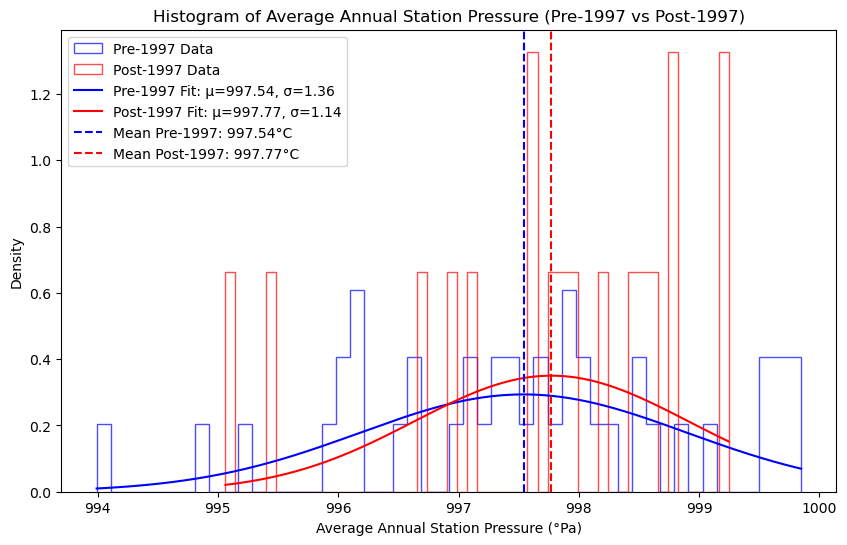

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)

start_year = 1841
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Station Pressure']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Station Pressure (°Pa)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Station Pressure (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Snow

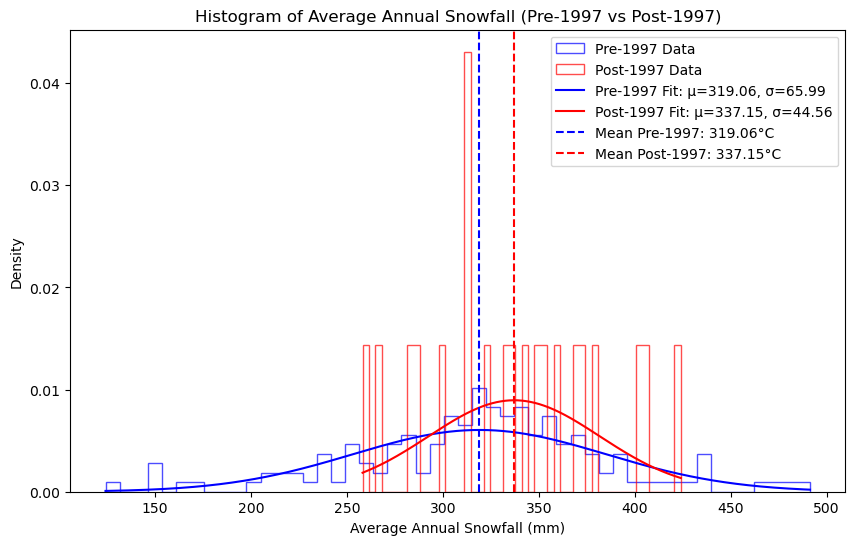

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)
start_year = 1850
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Snow']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Snowfall (mm)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Snowfall (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Total Precipitation

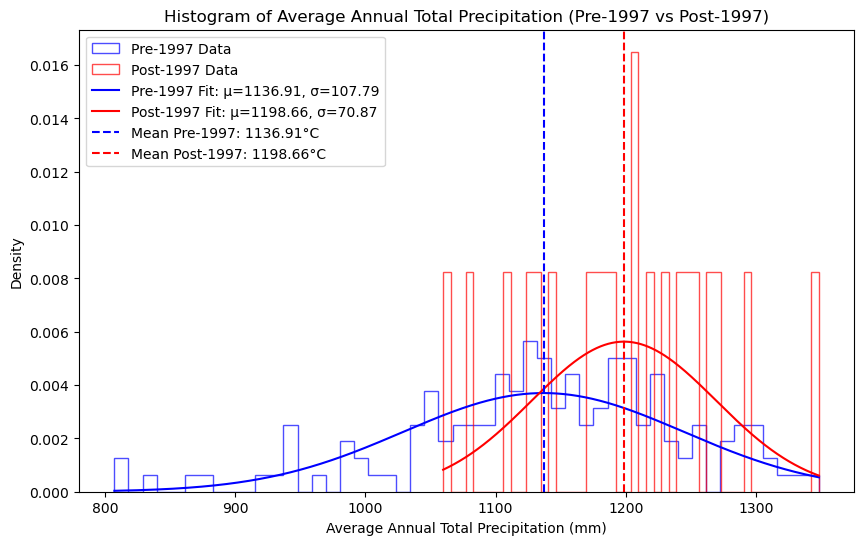

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)

start_year = 1850
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Total Precipitation']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Total Precipitation (mm)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Total Precipitation (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()


## Wind Speed

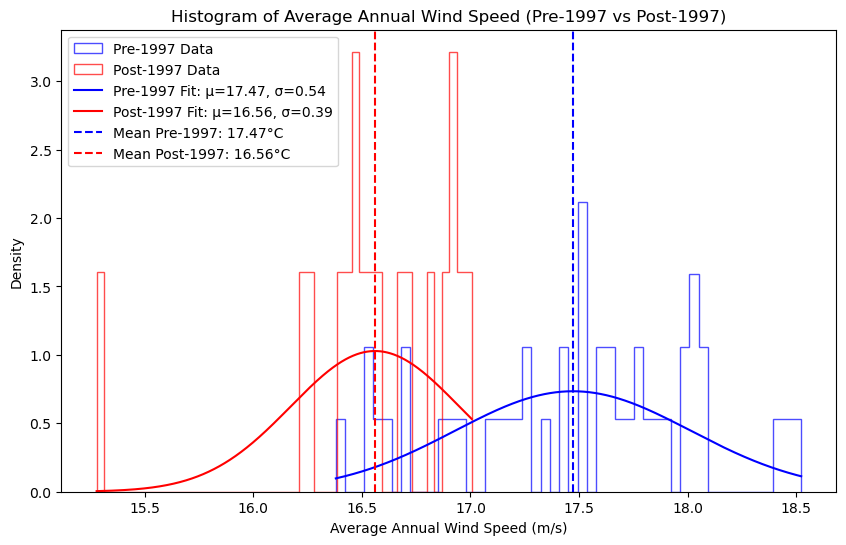

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'AHCCD_CONFINED.csv'
ahccd_data = pd.read_csv(file_path)

start_year = 1850
end_year = 2023
split_year = 1997

ahccd_data = ahccd_data[(ahccd_data['Year'] >= start_year) & (ahccd_data['Year'] <= end_year)]

temperature_data = ahccd_data[ahccd_data['Value Type'] == 'Mean Wind Speed']
annual_temperature = temperature_data.groupby('Year')['Annual'].mean()

pre_1990_temperature = annual_temperature[annual_temperature.index < split_year]
post_1990_temperature = annual_temperature[annual_temperature.index >= split_year]

mean_pre, std_pre = norm.fit(pre_1990_temperature)
mean_post, std_post = norm.fit(post_1990_temperature)

x_pre = np.linspace(pre_1990_temperature.min(), pre_1990_temperature.max(), 1000)
pdf_pre = norm.pdf(x_pre, mean_pre, std_pre)

x_post = np.linspace(post_1990_temperature.min(), post_1990_temperature.max(), 1000)
pdf_post = norm.pdf(x_post, mean_post, std_post)

plt.figure(figsize=(10, 6))
plt.hist(pre_1990_temperature, bins=50, density=True, alpha=0.7, label="Pre-1997 Data", color="blue", histtype="step")
plt.hist(post_1990_temperature, bins=50, density=True, alpha=0.7, label="Post-1997 Data", color="red", histtype="step")
plt.plot(x_pre, pdf_pre, label=f"Pre-1997 Fit: μ={mean_pre:.2f}, σ={std_pre:.2f}", color="blue")
plt.plot(x_post, pdf_post, label=f"Post-1997 Fit: μ={mean_post:.2f}, σ={std_post:.2f}", color="red")
plt.axvline(mean_pre, color="blue", linestyle="--", label=f"Mean Pre-1997: {mean_pre:.2f}°C")
plt.axvline(mean_post, color="red", linestyle="--", label=f"Mean Post-1997: {mean_post:.2f}°C")
plt.xlabel("Average Annual Wind Speed (m/s)")
plt.ylabel("Density")
plt.title("Histogram of Average Annual Wind Speed (Pre-1997 vs Post-1997)")
plt.legend()
plt.show()
